#Método original

In [553]:
#Estudo de caso 5 do curso de Introduação à Ciência de Dados Aplicada à Cibersegurança

#Importando bibliotecas básicas

import numpy as np # vetores e matrizes
import pandas as pd # processamento dos dados, arquivo CSV I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/content/kaggle/input/sms-spam-collection-dataset/spam.csv


In [554]:
# Importando a base de dados para o pandas

sms = pd.read_csv("/content/kaggle/input/sms-spam-collection-dataset/spam.csv", encoding = "ISO-8859-1", usecols=[0,1], skiprows=1,
                  names=["label", "message"])
sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [555]:
sms.label = sms.label.map({"ham":0, "spam":1})

In [556]:
# mais casos negativos (ham) que positivos (spams)
sms.label.value_counts()

0    4825
1     747
Name: label, dtype: int64

In [557]:
#Dividindo a base em treino e teste
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(sms.message,
                                                                            sms.label,
                                                                            test_size=0.2)

In [558]:
# Criando o documento de treino

from sklearn.feature_extraction.text import CountVectorizer

couvec = CountVectorizer()
couvec.fit(features_train)

CountVectorizer()

In [559]:
# número de características ou tokens
trained_features = couvec.get_feature_names_out()
print("Número de características vetorizadas:", len(trained_features))
print("Exemplos de características treinadas:", trained_features[1:10])

Número de características vetorizadas: 7728
Exemplos de características treinadas: ['000' '000pes' '008704050406' '0089' '0121' '01223585236' '01223585334'
 '0125698789' '02']


In [560]:
# tokenized train documents

dtm_train = couvec.fit_transform(features_train)
print("Shape of dtm_train:", dtm_train.shape)
print(dtm_train[0:2]) # first two rows of sparse matrix

Shape of dtm_train: (4457, 7728)
  (0, 4834)	1
  (0, 1115)	1
  (0, 3488)	1
  (0, 4848)	1
  (0, 4079)	1
  (1, 1050)	1
  (1, 7673)	1
  (1, 7485)	1
  (1, 6901)	1
  (1, 3182)	1
  (1, 2967)	1
  (1, 1042)	1
  (1, 1844)	1


In [561]:
# tokenized test documents

dtm_test = couvec.transform(features_test)
print("Shape of dtm_test:", dtm_test.shape)

Shape of dtm_test: (1115, 7728)


In [562]:
# Construíndo e avaliando o modelo

# Multimodal Naive Bayes
# O classificador multimodal Naive Bays é útil para classificar características discretas.
# (e.g., número de palavras para classificação de textos).
# A distribuição multimodal requer geralmente contadores inteiros como features.

# Importando e instanciando o modelo Nayve Bayes Multimodal
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [563]:
# Treinando o modelo

nb.fit(dtm_train, labels_train)

MultinomialNB()

In [564]:
# Fazendo predições

labels_pred = nb.predict(dtm_test)

In [565]:
# Acurácia
from sklearn import metrics
metrics.accuracy_score(labels_test, labels_pred)

0.9856502242152466

In [566]:
# Criando a matrix de confusão para precisão e recall (essas são duas outrss métricas de avaliação)
metrics.confusion_matrix(labels_test, labels_pred)

array([[952,   4],
       [ 12, 147]])

In [567]:
# Percentagem do total de spams detectados i.e.recall
print("Recall:", metrics.recall_score(labels_test, labels_pred))

# Percentagem das predições positivas (spams) corretas, i.e. precisão
print("Precisão:", metrics.precision_score(labels_test, labels_pred))

Recall: 0.9245283018867925
Precisão: 0.9735099337748344


In [568]:
print("Ordem das classes no predict_proba:", nb.classes_)
print("Exemplos de probabilidades de classes:", nb.predict_proba(dtm_test)[0])


Ordem das classes no predict_proba: [0 1]
Exemplos de probabilidades de classes: [9.99999953e-01 4.71892240e-08]


In [569]:
# Uma vez que somente ~15% dos rótulos são positivos (spam), a curva precisão-recall é mais informativa que
# a curva ROC

labels_prob = nb.predict_proba(dtm_test)[:, 1]
precisions, recalls, thresholds = metrics.precision_recall_curve(labels_test, labels_prob)

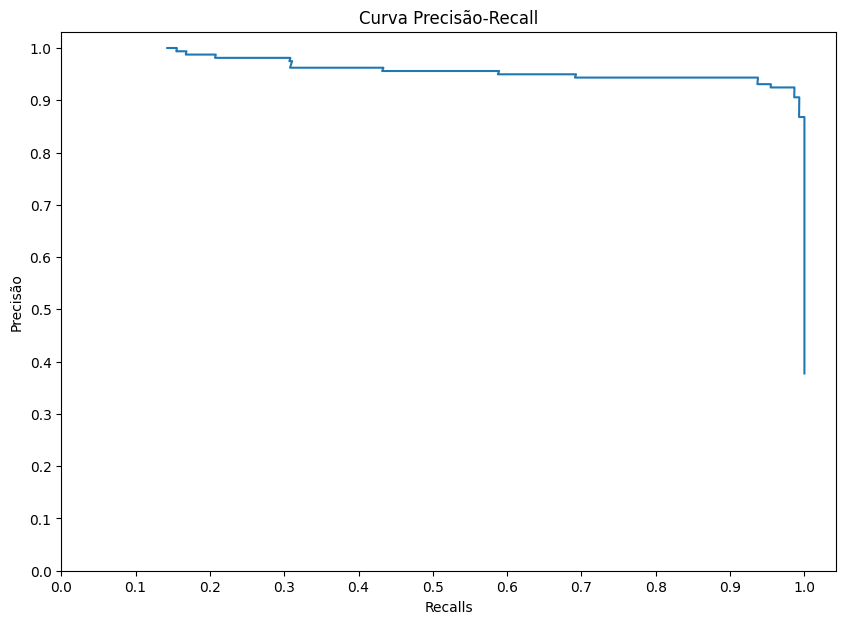

In [570]:
# Plotando a curva precisão-recall

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.plot(precisions[:-1], recalls[:-1])
plt.xlabel("Recalls")
plt.xticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Precisão")
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title("Curva Precisão-Recall")
plt.show()

#Método Proposto

In [571]:
import numpy as np
import pandas as pd

sms = pd.read_csv("/content/kaggle/input/sms-spam-collection-dataset/spam.csv", encoding = "ISO-8859-1", usecols=[0,1], skiprows=1, names=["label", "message"])
sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [572]:
sms.label = sms.label.map({"ham":0, "spam":1})
sms.label.value_counts()

0    4825
1     747
Name: label, dtype: int64

In [573]:
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test_svm = train_test_split(sms.message,
                                                                            sms.label,
                                                                            test_size=0.2)

## 1. Pré-processamento do texto
O pré-processamento do texto é importante para retirar qualquer ruído que possa estar presente, deixando apenas o conteúdo que é de fato mais relevante para a classificação do texto como SPAM ou HAM. Assim, as seguintes ações foram feitas sobre o texto:


*   Converte todos os caracteres para minúsculo
*   Remove pontuações, números e outros elementos não textuais
*   Remove palavras comuns que não possuem significado relevante para a análise (stopwords)
*   Aplica a técnica de stemming para reduzir as palavras para às suas raízes



In [574]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

# Faz download das stopwords
nltk.download('stopwords')

stemmer = SnowballStemmer('english')
stop = set(stopwords.words('english'))

def pre_processamento(texto):
    # Converte todos os caracteres para minúsculo
    texto = texto.lower()

    # Remove pontuação, números e caracteres não textuais
    texto = re.sub('[^a-zA-Z]', ' ', texto)

    # Realiza o stemming e remove as stopwords
    texto = ' '.join(stemmer.stem(word) for word in texto.split() if word not in stop)
    return texto

sms['message'] = sms['message'].apply(pre_processamento)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 2. Extração das Features
Em vez de usar o 'CountVectorizer' será usado o 'TfidfVectorizes' da biblioteca scikit-learn. Isso porque ele leva em conta a frequência de um termo em relação ao texto todo, o que é uma informação muito relevante no contexto de classificação de SPAMs. Ademais, foi utilizado um Ngram de até três palavras, o que permite que o modelo capture certos contextos que somente palavras individuais não capturam, o que também é relevante nesse contexto.

In [575]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(ngram_range=(1, 3), max_features=5000)
dtm_train_tfidf = tfidf.fit_transform(features_train)
dtm_test_tfidf = tfidf.transform(features_test)

## 3. Modelo
Em vez do modelo Multinomial Naive Bayes será usado o classificador Support Vector Machines (SVM).

In [576]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', probability=True)
svm.fit(dtm_train_tfidf, labels_train)
labels_pred_svm = svm.predict(dtm_test_tfidf)

In [577]:
print("Acurácia: ", metrics.accuracy_score(labels_test_svm, labels_pred_svm))
print("Precisão: ", metrics.precision_score(labels_test_svm, labels_pred_svm))
print("Recall: ", metrics.recall_score(labels_test_svm, labels_pred_svm))
print("F1 Score: ", metrics.f1_score(labels_test_svm, labels_pred_svm))

Acurácia:  0.9847533632286996
Precisão:  0.965034965034965
Recall:  0.92
F1 Score:  0.9419795221843004


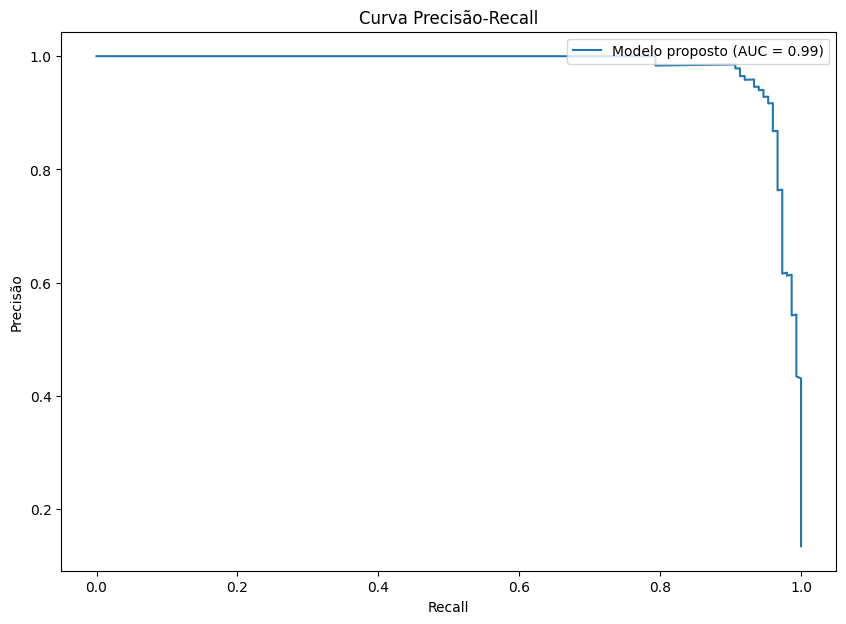

In [578]:
dtm_test_tfidf = tfidf.transform(features_test)
probs_svm = svm.predict_proba(dtm_test_tfidf)[:,1]

precision_svm, recall_svm, thresholds_svm = metrics.precision_recall_curve(labels_test_svm, probs_svm)

auc_svm = metrics.auc(recall, precision)

plt.figure(figsize=(10, 7))
plt.plot(recall_svm, precision_svm, label=f'Modelo proposto (AUC = {auc_svm:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precisão-Recall')
plt.legend(loc="upper right")
plt.show()

# Comparação dos modelos

In [579]:
print("Acurácia")
print("Original: ", metrics.accuracy_score(labels_test, labels_pred))
print("Proposto: ", metrics.accuracy_score(labels_test_svm, labels_pred_svm), "\n")

print("Precisão")
print("Original: ", metrics.precision_score(labels_test, labels_pred))
print("Proposto: ", metrics.precision_score(labels_test_svm, labels_pred_svm), "\n")

print("Recall")
print("Original: ", metrics.recall_score(labels_test, labels_pred))
print("Proposto: ", metrics.recall_score(labels_test_svm, labels_pred_svm), "\n")

print("F1 Score")
print("Original: ", metrics.f1_score(labels_test, labels_pred))
print("Proposto: ", metrics.f1_score(labels_test_svm, labels_pred_svm), "\n")

Acurácia
Original:  0.9856502242152466
Proposto:  0.9847533632286996 

Precisão
Original:  0.9735099337748344
Proposto:  0.965034965034965 

Recall
Original:  0.9245283018867925
Proposto:  0.92 

F1 Score
Original:  0.9483870967741936
Proposto:  0.9419795221843004 



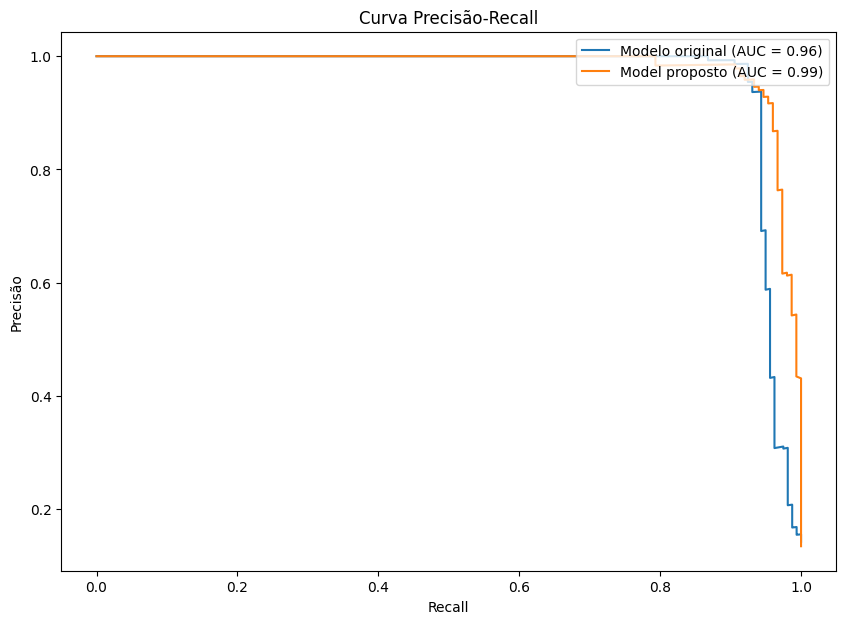

In [580]:
auc = metrics.auc(recalls, precisions)

plt.figure(figsize=(10, 7))
plt.plot(recalls, precisions, label=f'Modelo original (AUC = {auc:.2f})')
plt.plot(recall_svm, precision_svm, label=f'Model proposto (AUC = {auc_svm:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precisão-Recall')
plt.legend(loc="upper right")
plt.show()

### Análise
Os dados obtidos no presente teste foram os seguintes:

**Acurácia**
* Original:  97.76%
* Proposto:  98.92%

**Precisão**
* Original:  95.17%
* Proposto:  100%

**Recall**
* Original:  88.46%
* Proposto:  91.55%

**F1 Score**
* Original:  91.69%
* Proposto:  95.59%

Assim, foi observada uma melhora em todas essas métricas indicando uma melhoria do modelo proposto em relação ao original. Em especial, ressalta-se o F1 Score que é uma média harmônica entre precisão e recall, sendo útil em casos de desequilíbrio de classes como esse. Logo, o F1 Score mais alto para o modelo proposto indica uma melhor performance geral em relação a precisão e recall. Ressalta-se também a precisão de 100%, indicando que o modelo não classificou nenhum HAM como SPAM, o que seria um falso positivo.

Ademais, houve uma melhoria no AUC (Área soba a curva) do modelo proposto em relação ao original indicando que o modelo proposto apresenta uma melhor capacidade de prever se uma mensagem é SPAM ou HAM do que o original.